## Coursera Applied Data Science Capstone

## Data gathering

In [25]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

 - Scape neighborhood postal codes from wikipedia
 - Convert to Pandas dataframe
 - Clean dataframe

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
source = BeautifulSoup(url.content,'lxml')
table = source.find_all('table')[0]

In [3]:
df = pd.read_html(str(table))
neighborhood = pd.DataFrame(df[0])
neighborhood.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


 - Search for and remove rows without an assigned borough

In [4]:
neighborhood['Borough'].value_counts()

Not assigned        77
Etobicoke           45
North York          38
Scarborough         37
Downtown Toronto    37
Central Toronto     17
West Toronto        13
York                 9
East Toronto         7
East York            6
Mississauga          1
Name: Borough, dtype: int64

In [5]:
notAssign = neighborhood[neighborhood['Borough'] == 'Not assigned'].index
neighborhood.drop(notAssign, inplace=True)
neighborhood['Borough'].value_counts()

Etobicoke           45
North York          38
Scarborough         37
Downtown Toronto    37
Central Toronto     17
West Toronto        13
York                 9
East Toronto         7
East York            6
Mississauga          1
Name: Borough, dtype: int64

 - Remove the Mississauga entry and combine the 4 Torontos into Old Toronto

In [6]:
missi = neighborhood[neighborhood['Borough'] == 'Mississauga'].index
neighborhood.drop(missi, inplace=True)

In [7]:
neighborhood.loc[(neighborhood.Borough == 'Downtown Toronto'),'Borough']='Old Toronto'
neighborhood.loc[(neighborhood.Borough == 'Central Toronto'),'Borough']='Old Toronto'
neighborhood.loc[(neighborhood.Borough == 'West Toronto'),'Borough']='Old Toronto'
neighborhood.loc[(neighborhood.Borough == 'East Toronto'),'Borough']='Old Toronto'
neighborhood['Borough'].value_counts()

Old Toronto    74
Etobicoke      45
North York     38
Scarborough    37
York            9
East York       6
Name: Borough, dtype: int64

 - Check for rows without an assigned neighborhood

In [8]:
neighborhood[neighborhood.Neighbourhood == 'Not assigned']

,Postcode,Borough,Neighbourhood


 - Group rows by postcode and combine neighborhoods then report final shape

In [9]:
tor_df = neighborhood.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
tor_df.columns = ['Postal Code', 'Borough', 'Neighborhood']
tor_df.head(10)

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [10]:
tor_df.shape

(102, 3)

 - Scrape neighborhood population from Wikipedia
 - Convert to Pandas dataframe
 - Clean dataframe

In [11]:
url2 = requests.get('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods')
source2 = BeautifulSoup(url2.content,'lxml')
table2 = source2.find_all('table')[1]

In [12]:
df = pd.read_html(str(table2))
df_pop = pd.DataFrame(df[0])
df_pop.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


 - Remove index 0
 - Remove all columns except FM and Population
 - Group by FM and sum population
 - Rename FM to match boroughs

In [13]:
df_pop.drop(0, inplace=True)
df_pop2 = df_pop[['FM', 'Population']]
df_pop2 = df_pop2.groupby(['FM']).sum().reset_index()
df_pop2.columns = ['Borough', 'Population']
df_pop2.loc[(df_pop2.Borough == 'E'),'Borough'] = 'Etobicoke'
df_pop2.loc[(df_pop2.Borough == 'EY'),'Borough'] = 'East York'
df_pop2.loc[(df_pop2.Borough == 'NY'),'Borough'] = 'North York'
df_pop2.loc[(df_pop2.Borough == 'OCoT'),'Borough'] = 'Old Toronto'
df_pop2.loc[(df_pop2.Borough == 'S'),'Borough'] = 'Scarborough'
df_pop2.loc[(df_pop2.Borough == 'Y'),'Borough'] = 'York'
df_pop2

,Borough,Population
0,Etobicoke,313772
1,East York,112054
2,North York,621068
3,Old Toronto,624910
4,Scarborough,600715
5,York,143255


 - Load postal code latitude and longitude .csv provided by IBM through Coursera
 - Merge neighborhoods with the same postal code in the tor_data dataframe
 - Create individual dataframes for the 6 boroughs from the merged dataframe

In [14]:
geo_data = pd.read_csv('http://cocl.us/Geospatial_data')
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [15]:
tor_data = pd.merge(tor_df, geo_data, on = 'Postal Code', how = 'inner')
tor_data.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [69]:
eto = tor_data[tor_data['Borough'] == 'Etobicoke'].reset_index(drop = True)
n_york = tor_data[tor_data['Borough'] == 'North York'].reset_index(drop = True)
scar = tor_data[tor_data['Borough'] == 'Scarborough'].reset_index(drop = True)
york = tor_data[tor_data['Borough'] == 'York'].reset_index(drop = True)
e_york = tor_data[tor_data['Borough'] == 'East York'].reset_index(drop = True)
o_tor = tor_data[tor_data['Borough'] == 'Old Toronto'].reset_index(drop = True)

 - Use Foursquare to gather restaurant information for each borough using a radius of 500 meters
 - Store results in individual dataframes
 - Gather the number of mexican restaurants in each borough

In [55]:
CLIENT_ID = '33PLPEHKJ5SQMLKXQEUQDVAU5IQQCMKBHF42I4T21PWEXIFI'
CLIENT_SECRET = 'KJD1BA4TKA0ZOPS2RON24AGTWTZT0XSA0Y1JO1DU0CNUK2EX'
VERSION = '20180605'
LIMIT = 100
query = 'Mexican food'
print('Foursquare credentials stored')

Foursquare credentials stored


In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            query)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [74]:
#Etobicoke
eto_rest = getNearbyVenues(names=eto['Neighborhood'], latitudes=eto['Latitude'], longitudes=eto['Longitude'])

Humber Bay Shores, Mimico South, New Toronto
Alderwood, Long Branch
The Kingsway, Montgomery Road, Old Mill North
Humber Bay, King's Mill Park, Kingsway Park South East, Mimico NE, Old Mill South, The Queensway East, Royal York South East, Sunnylea
Kingsway Park South West, Mimico NW, The Queensway West, Royal York South West, South of Bloor
Islington Avenue
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Westmount
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown
Northwest


In [75]:
#North York
n_york_rest = getNearbyVenues(names=n_york['Neighborhood'], latitudes=n_york['Latitude'], longitudes=n_york['Longitude'])

Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Heights, Lawrence Manor
Glencairn
Downsview, North Park, Upwood Park
Humber Summit
Emery, Humberlea


In [77]:
#Scarborough
scar_rest = getNearbyVenues(names=scar['Neighborhood'], latitudes=scar['Latitude'], longitudes=scar['Longitude'])

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [78]:
#York
york_rest = getNearbyVenues(names=york['Neighborhood'], latitudes=york['Latitude'], longitudes=york['Longitude'])

Humewood-Cedarvale
Caledonia-Fairbanks
Del Ray, Keelesdale, Mount Dennis, Silverthorn
The Junction North, Runnymede
Weston


In [79]:
#East York
e_york_rest = getNearbyVenues(names=e_york['Neighborhood'], latitudes=e_york['Latitude'], longitudes=e_york['Longitude'])

Woodbine Gardens, Parkview Hill
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto


In [81]:
#Old Toronto
o_tor_rest = getNearbyVenues(names=o_tor['Neighborhood'], latitudes=o_tor['Latitude'], longitudes=o_tor['Longitude'])

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [88]:
print('Etobicoke restaurants', eto_rest['Venue'].count())
print('North York restaurants', n_york_rest['Venue'].count())
print('Scarborough restaurants', scar_rest['Venue'].count())
print('York restaurants', york_rest['Venue'].count())
print('East York restaurants', e_york_rest['Venue'].count())
print('Old Toronto restaurants', o_tor_rest['Venue'].count())

Etobicoke restaurants 3
North York restaurants 7
Scarborough restaurants 3
York restaurants 2
East York restaurants 2
Old Toronto restaurants 114


 - Create final overview dataframe using the gathered data that will be used for analysis

In [108]:
restaurants = [['Etobicoke', 3], ['North York', 7], ['Scarborough', 3], ['York', 2], ['East York', 2], ['Old Toronto', 114]]
df_res = pd.DataFrame(restaurants, columns = ['Borough', 'Mexican Restaurants'])
overview = pd.merge(df_pop2, df_res, on = 'Borough', how = 'inner')
overview['Population'] = overview['Population'] / 100000
overview['Population'] = overview['Population'].round(2)
overview.columns = ['Borough', 'Population *100,000', 'Restaurants']
overview.insert(3, 'Restaurants/100,000', [1, 1, 1, 1, 1, 1])
overview['Restaurants/100,000'] = overview['Restaurants'] / overview['Population *100,000']
overview

,Borough,"Population *100,000",Restaurants,"Restaurants/100,000"
0,Etobicoke,3.14,3,0.955414
1,East York,1.12,2,1.785714
2,North York,6.21,7,1.127214
3,Old Toronto,6.25,114,18.240000
4,Scarborough,6.01,3,0.499168
5,York,1.43,2,1.398601


## Evaluation

 - As seen from the dataframe, Old Toronto is an outlier. Demonstrate this with a bar graph
 - Remove Old Toronto and plot the Restaurants/100,000
 - Map of restaurant locations in Scarborough and Etobicoke as they have less than 1 restaurant per 100,000 people

In [110]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [125]:
df_p1 = overview[['Borough', 'Population *100,000', 'Restaurants']]
df_p1.set_index('Borough', inplace=True)
df_p1.sort_values(['Population *100,000'], ascending=False, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


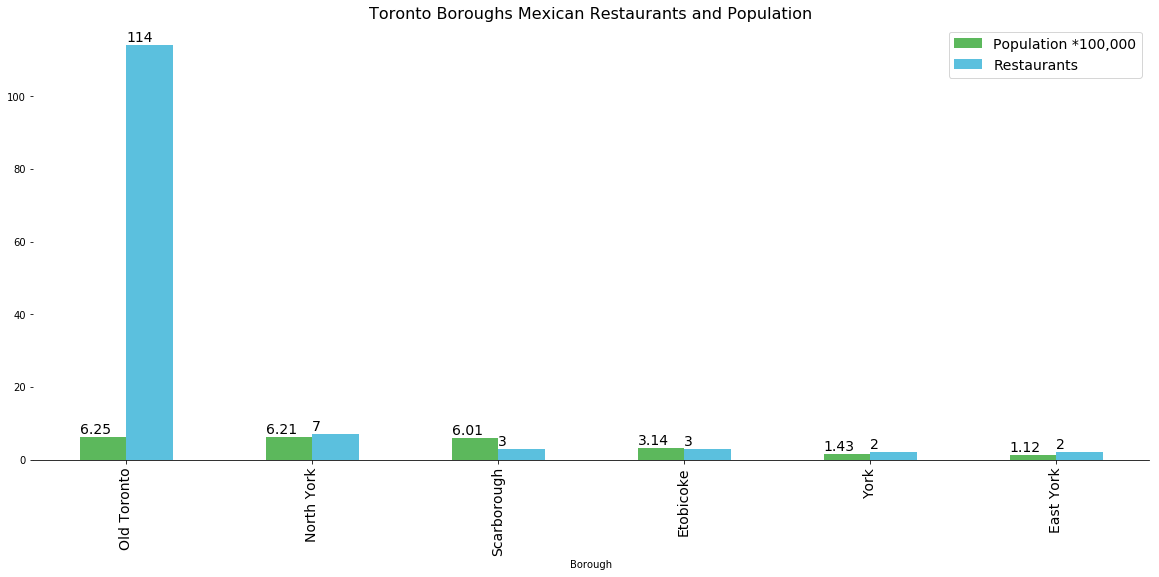

In [126]:
ax = df_p1.plot(kind='bar', figsize = (20, 8), color = ['#5cb85c', '#5bc0de'])
ax.set_title('Toronto Boroughs Mexican Restaurants and Population', fontsize = 16)
ax.legend(fontsize = 14)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'x', which = 'major', labelsize = 14)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1, str(i.get_height()), fontsize = 14)

In [123]:
df_p2 = overview[['Borough', 'Restaurants/100,000']]
df_p2.sort_values(['Restaurants/100,000'], ascending=False, inplace=True)
df_p2.set_index(['Borough'], inplace=True)
df_p2.drop('Old Toronto', inplace=True)
df_p2['Restaurants/100,000'] = df_p2['Restaurants/100,000'].round(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


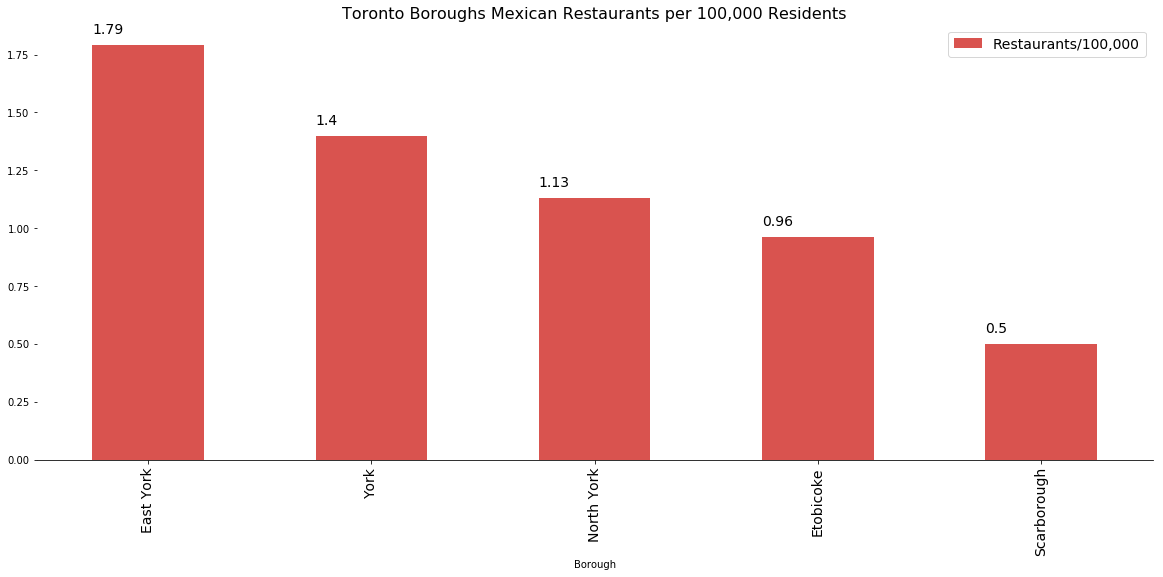

In [124]:
ax = df_p2.plot(kind='bar', figsize = (20, 8), color = '#d9534f')
ax.set_title('Toronto Boroughs Mexican Restaurants per 100,000 Residents', fontsize = 16)
ax.legend(fontsize = 14)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'x', which = 'major', labelsize = 14)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.05, str(i.get_height()), fontsize = 14)

 - Maps created for restaurant locations in Etobicoke and Scarborough below, these may not display on GitHub

In [132]:
eto_map = folium.Map(location=[43.6205, -79.5132], zoom_start = 11)

for lat, lng in zip(eto_rest['Venue Latitude'], eto_rest['Venue Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'green',
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.5).add_to(eto_map)

eto_map

In [133]:
scar_map = folium.Map(location=[43.7764, -79.2318], zoom_start = 11)

for lat, lng in zip(scar_rest['Venue Latitude'], scar_rest['Venue Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'orange',
        fill = True,
        fill_color = 'orange',
        fill_opacity = 0.5).add_to(scar_map)

scar_map